In [96]:
%load_ext autoreload
%autoreload 2

import numpy as np
import polars as pl
import networkx as nx

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network
from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions,
    get_mirna_gene_interactions,
    gg_interactions,
    pp_interactions,
    tf_links
)
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_disease/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [98]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=60,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-12-06 11:41:16,056] A new study created in memory with name: no-name-228bce7c-7f3b-466a-ad2f-fe5ebfa607f4
[I 2024-12-06 11:41:16,251] Trial 0 finished with value: 0.6022120594382817 and parameters: {'booster': 'gblinear', 'lambda': 3.113104760952469e-06, 'alpha': 0.0004771108311757225}. Best is trial 0 with value: 0.6022120594382817.
[I 2024-12-06 11:41:16,402] Trial 1 finished with value: 0.6460639796087643 and parameters: {'booster': 'gblinear', 'lambda': 1.6054506359043014e-07, 'alpha': 0.015473090209437317}. Best is trial 1 with value: 0.6460639796087643.


New best score: 0.602
Best model performance:
Accuracy: 0.879 ± 0.049
F1 Macro: 0.783 ± 0.062
F1 Weighted: 0.875 ± 0.048
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.8, 'f1_macro': np.float64(0.7204968944099379), 'f1_weighted': np.float64(0.8099378881987577)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.8148148148148148), 'f1_weighted': np.float64(0.9234567901234567)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]
New best score: 0.646
Best model performance:
Accuracy: 0.906 ± 0.032
F1 Macro: 0.799 ± 0.075
F1 Weighted: 0.893 ± 0.044
[{'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7115384615384616), 'f1_weighted': np.float64(0.8384615384615385)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(

[I 2024-12-06 11:41:16,579] Trial 2 finished with value: 0.6684310669837741 and parameters: {'booster': 'gblinear', 'lambda': 1.0068934833977492e-07, 'alpha': 1.6694905282219598e-07}. Best is trial 2 with value: 0.6684310669837741.


New best score: 0.668
Best model performance:
Accuracy: 0.892 ± 0.032
F1 Macro: 0.834 ± 0.039
F1 Weighted: 0.898 ± 0.028
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.8295454545454546), 'f1_weighted': np.float64(0.8772727272727272)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8666666666666667)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.7916666666666666), 'f1_weighted': np.float64(0.8833333333333333)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-12-06 11:41:16,799] Trial 3 finished with value: 0.37700631694988224 and parameters: {'booster': 'gbtree', 'lambda': 1.0877707890202679e-07, 'alpha': 0.00015369798561652072, 'max_depth': 8, 'eta': 0.0003518716177985647, 'gamma': 1.842333011720528e-05, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.6684310669837741.
[I 2024-12-06 11:41:17,000] Trial 4 finished with value: 0.49872960448032255 and parameters: {'booster': 'gbtree', 'lambda': 5.7728418818720326e-05, 'alpha': 0.08154062620731697, 'max_depth': 1, 'eta': 0.0009521446548764747, 'gamma': 3.8225177414776086e-08, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.6684310669837741.
[I 2024-12-06 11:41:17,217] Trial 5 finished with value: 0.49872960448032255 and parameters: {'booster': 'dart', 'lambda': 0.5445501087733751, 'alpha': 1.1963286816725748e-07, 'max_depth': 1, 'eta': 0.0006480938253824538, 'gamma': 6.913310827097266e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': '

New best score: 0.736
Best model performance:
Accuracy: 0.919 ± 0.026
F1 Macro: 0.870 ± 0.020
F1 Weighted: 0.921 ± 0.022
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.8666666666666667, 'f1_macro': np.float64(0.8295454545454546), 'f1_weighted': np.float64(0.8772727272727272)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.9386666666666666)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-12-06 11:41:18,699] Trial 13 finished with value: 0.6969916972772877 and parameters: {'booster': 'gblinear', 'lambda': 1.0556467849053816e-08, 'alpha': 4.208389452988045e-06}. Best is trial 11 with value: 0.7362098798554709.
[I 2024-12-06 11:41:18,868] Trial 14 finished with value: 0.6642222969987204 and parameters: {'booster': 'gblinear', 'lambda': 1.0049667640238183e-08, 'alpha': 7.206633056140712e-06}. Best is trial 11 with value: 0.7362098798554709.
[I 2024-12-06 11:41:19,126] Trial 15 finished with value: 0.4960685702412563 and parameters: {'booster': 'gbtree', 'lambda': 0.00019695337448761703, 'alpha': 1.7878929621484884e-05, 'max_depth': 5, 'eta': 4.1620270240370545e-08, 'gamma': 0.965461331764762, 'grow_policy': 'lossguide'}. Best is trial 11 with value: 0.7362098798554709.
[I 2024-12-06 11:41:19,282] Trial 16 finished with value: 0.6022120594382817 and parameters: {'booster': 'gblinear', 'lambda': 0.0002143934086351059, 'alpha': 0.00247545394490564}. Best is trial 11 w

New best score: 0.806
Best model performance:
Accuracy: 0.946 ± 0.027
F1 Macro: 0.904 ± 0.048
F1 Weighted: 0.944 ± 0.028
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-12-06 11:41:20,464] Trial 22 finished with value: 0.806425114231087 and parameters: {'booster': 'gblinear', 'lambda': 0.0005877594685417918, 'alpha': 6.158556781995644e-07}. Best is trial 20 with value: 0.806425114231087.
[I 2024-12-06 11:41:20,633] Trial 23 finished with value: 0.806425114231087 and parameters: {'booster': 'gblinear', 'lambda': 0.000763065565609353, 'alpha': 1.225116058579126e-06}. Best is trial 20 with value: 0.806425114231087.
[I 2024-12-06 11:41:20,788] Trial 24 finished with value: 0.806425114231087 and parameters: {'booster': 'gblinear', 'lambda': 0.0013377099861469253, 'alpha': 9.746384931498875e-07}. Best is trial 20 with value: 0.806425114231087.
[I 2024-12-06 11:41:20,959] Trial 25 finished with value: 0.7039337563024542 and parameters: {'booster': 'gblinear', 'lambda': 0.2508594398517468, 'alpha': 2.0100693806436064e-05}. Best is trial 20 with value: 0.806425114231087.
[I 2024-12-06 11:41:21,121] Trial 26 finished with value: 0.7581635155117249 and p

New best score: 0.852
Best model performance:
Accuracy: 0.959 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.958 ± 0.034
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.9285714285714286, 'f1_macro': np.float64(0.8782608695652174), 'f1_weighted': np.float64(0.9341614906832298)}]


[I 2024-12-06 11:41:22,477] Trial 33 finished with value: 0.806425114231087 and parameters: {'booster': 'gblinear', 'lambda': 0.0004552485332846696, 'alpha': 2.0259128020459623e-07}. Best is trial 31 with value: 0.8523255135749392.
[I 2024-12-06 11:41:22,651] Trial 34 finished with value: 0.6022120594382817 and parameters: {'booster': 'gblinear', 'lambda': 2.7926611316240088e-05, 'alpha': 7.67877042412451e-05}. Best is trial 31 with value: 0.8523255135749392.
[I 2024-12-06 11:41:22,824] Trial 35 finished with value: 0.806425114231087 and parameters: {'booster': 'gblinear', 'lambda': 0.005349540682840248, 'alpha': 5.153299974080704e-07}. Best is trial 31 with value: 0.8523255135749392.
[I 2024-12-06 11:41:22,983] Trial 36 finished with value: 0.8523939840000002 and parameters: {'booster': 'gblinear', 'lambda': 0.002536913191755025, 'alpha': 5.1663026681012464e-08}. Best is trial 36 with value: 0.8523939840000002.


New best score: 0.852
Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
[{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-12-06 11:41:23,212] Trial 37 finished with value: 0.4658631883959173 and parameters: {'booster': 'gbtree', 'lambda': 0.016270498746392113, 'alpha': 4.032869454555502e-08, 'max_depth': 2, 'eta': 1.4276156848030137e-06, 'gamma': 0.8329909822484604, 'grow_policy': 'lossguide'}. Best is trial 36 with value: 0.8523939840000002.
[I 2024-12-06 11:41:23,388] Trial 38 finished with value: 0.8523939840000002 and parameters: {'booster': 'gblinear', 'lambda': 0.0031578353711270964, 'alpha': 1.3289983550012278e-07}. Best is trial 36 with value: 0.8523939840000002.
[I 2024-12-06 11:41:23,542] Trial 39 finished with value: 0.8523939840000002 and parameters: {'booster': 'gblinear', 'lambda': 0.0019433060940049443, 'alpha': 1.4763665929248886e-07}. Best is trial 36 with value: 0.8523939840000002.
[I 2024-12-06 11:41:23,819] Trial 40 finished with value: 0.37700631694988224 and parameters: {'booster': 'dart', 'lambda': 0.0034641886775866903, 'alpha': 1.2811868556724926e-07, 'max_depth': 5, 'eta'

Best model performance:
Accuracy: 0.960 ± 0.033
F1 Macro: 0.928 ± 0.059
F1 Weighted: 0.957 ± 0.035
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 0.002536913191755025, 'alpha': 5.1663026681012464e-08}


In [99]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.9333333333333333, 'f1_macro': np.float64(0.88), 'f1_weighted': np.float64(0.928)}
{'ENSG00000181826': [0.0777098760008812, -0.0769931897521019], 'ENSG00000278588': [0.045107513666152954, -0.04776448383927345], 'ENSG00000120594': [0.031906984746456146, -0.03514845669269562], 'ENSG00000121797': [-0.06543634831905365, 0.05843682214617729], 'ENSG00000140398': [0.05967101827263832, -0.05717187374830246], 'ENSG00000168062': [-0.0812406837940216, 0.07608302682638168], 'ENSG00000174307': [-0.07840952277183533, 0.0770542323589325], 'ENSG00000184897': [0.04699397459626198, -0.04679642617702484], 'ENSG00000105497': [-0.054825183004140854, 0.05809129774570465], 'ENSG00000113552': [-0.06893404573202133, 0.06777990609407425], 'ENSG00000188536': [-0.0729762390255928, 0.0651996061205864], 'ENSG00000181004': [-0.05090199410915375, 0.050258636474609375], 'ENSG00000143590': [-0.07758019864559174, 0.07549243420362473], 'ENSG00000006534': [-0.061010196805000305, 0.06091010943055153], 'ENSG0000018

In [100]:
fi_sorted['hsa_circ_0005325']

1.0490756034851074

In [101]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

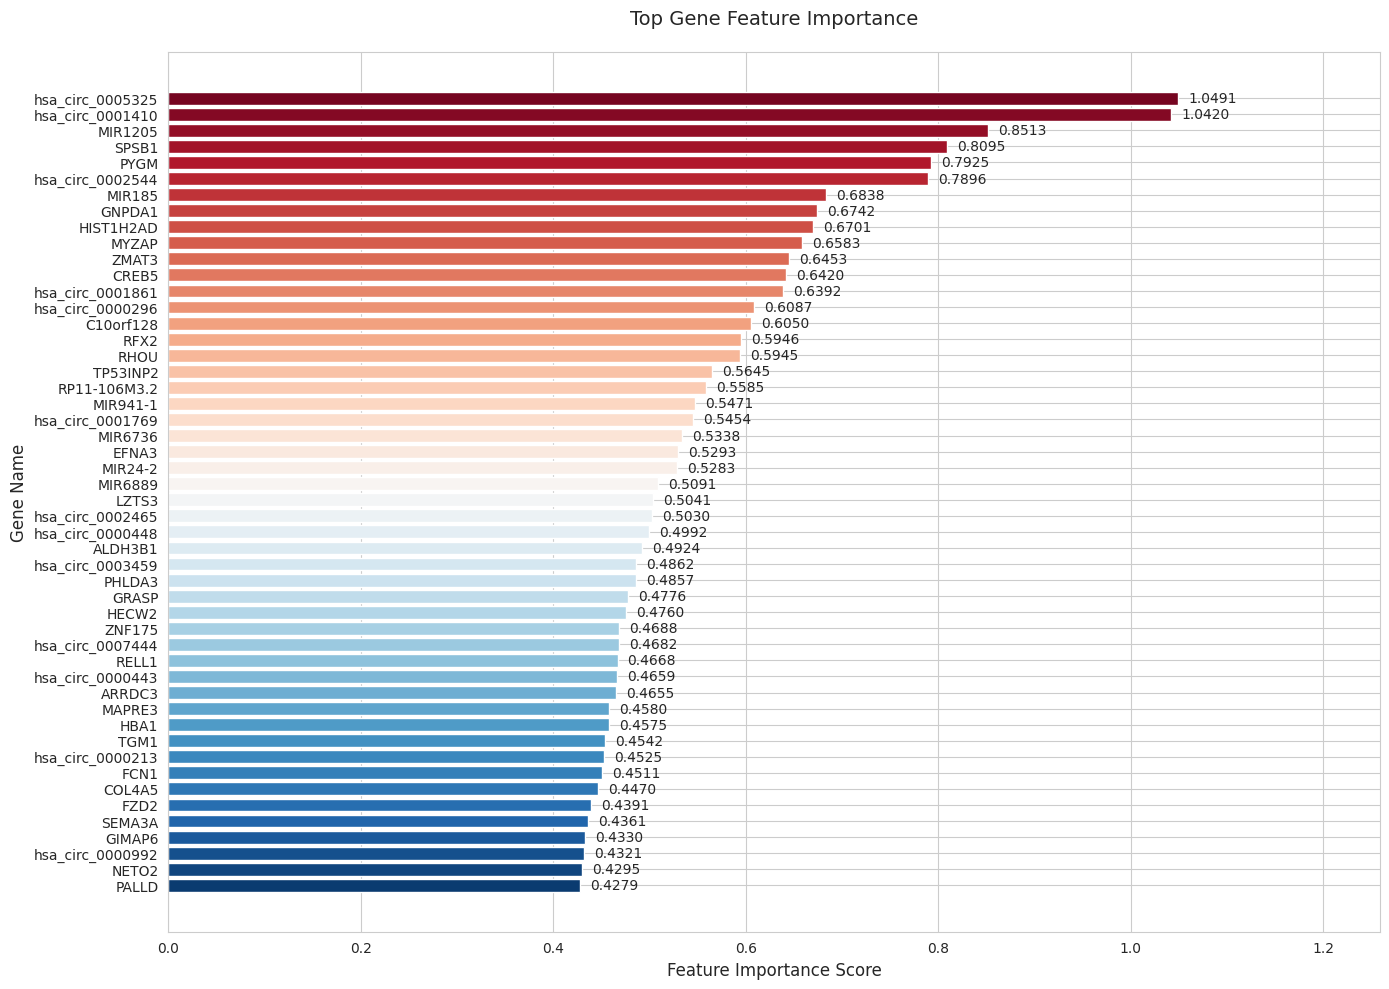

In [102]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=50, title="Top Genes", save_file=None)

- [hsa_circ_0005325 significantly upregulated in colorectal cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC10952939/)
- []()

In [129]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

print(mrna_dict['CD79B'])

# keep only top 30 out of each list
n_top_genes = 50
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

0.09683979488909245


In [118]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
tf_links_A = tf_links(
    mrna_genes,
    mrna_genes,
    tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_SS_simpleFormat_v1.0.tsv",
    # tflinksdb="interaction_data/TFLink_Homo_sapiens_interactions_LS_simpleFormat_v1.0.tsv",
)
mrna_A = torch.logical_or(gg_A, pp_A).logical_or(tf_links_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum() - mrna_A.trace(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(13), tensor(32.), tensor(15.))

3103


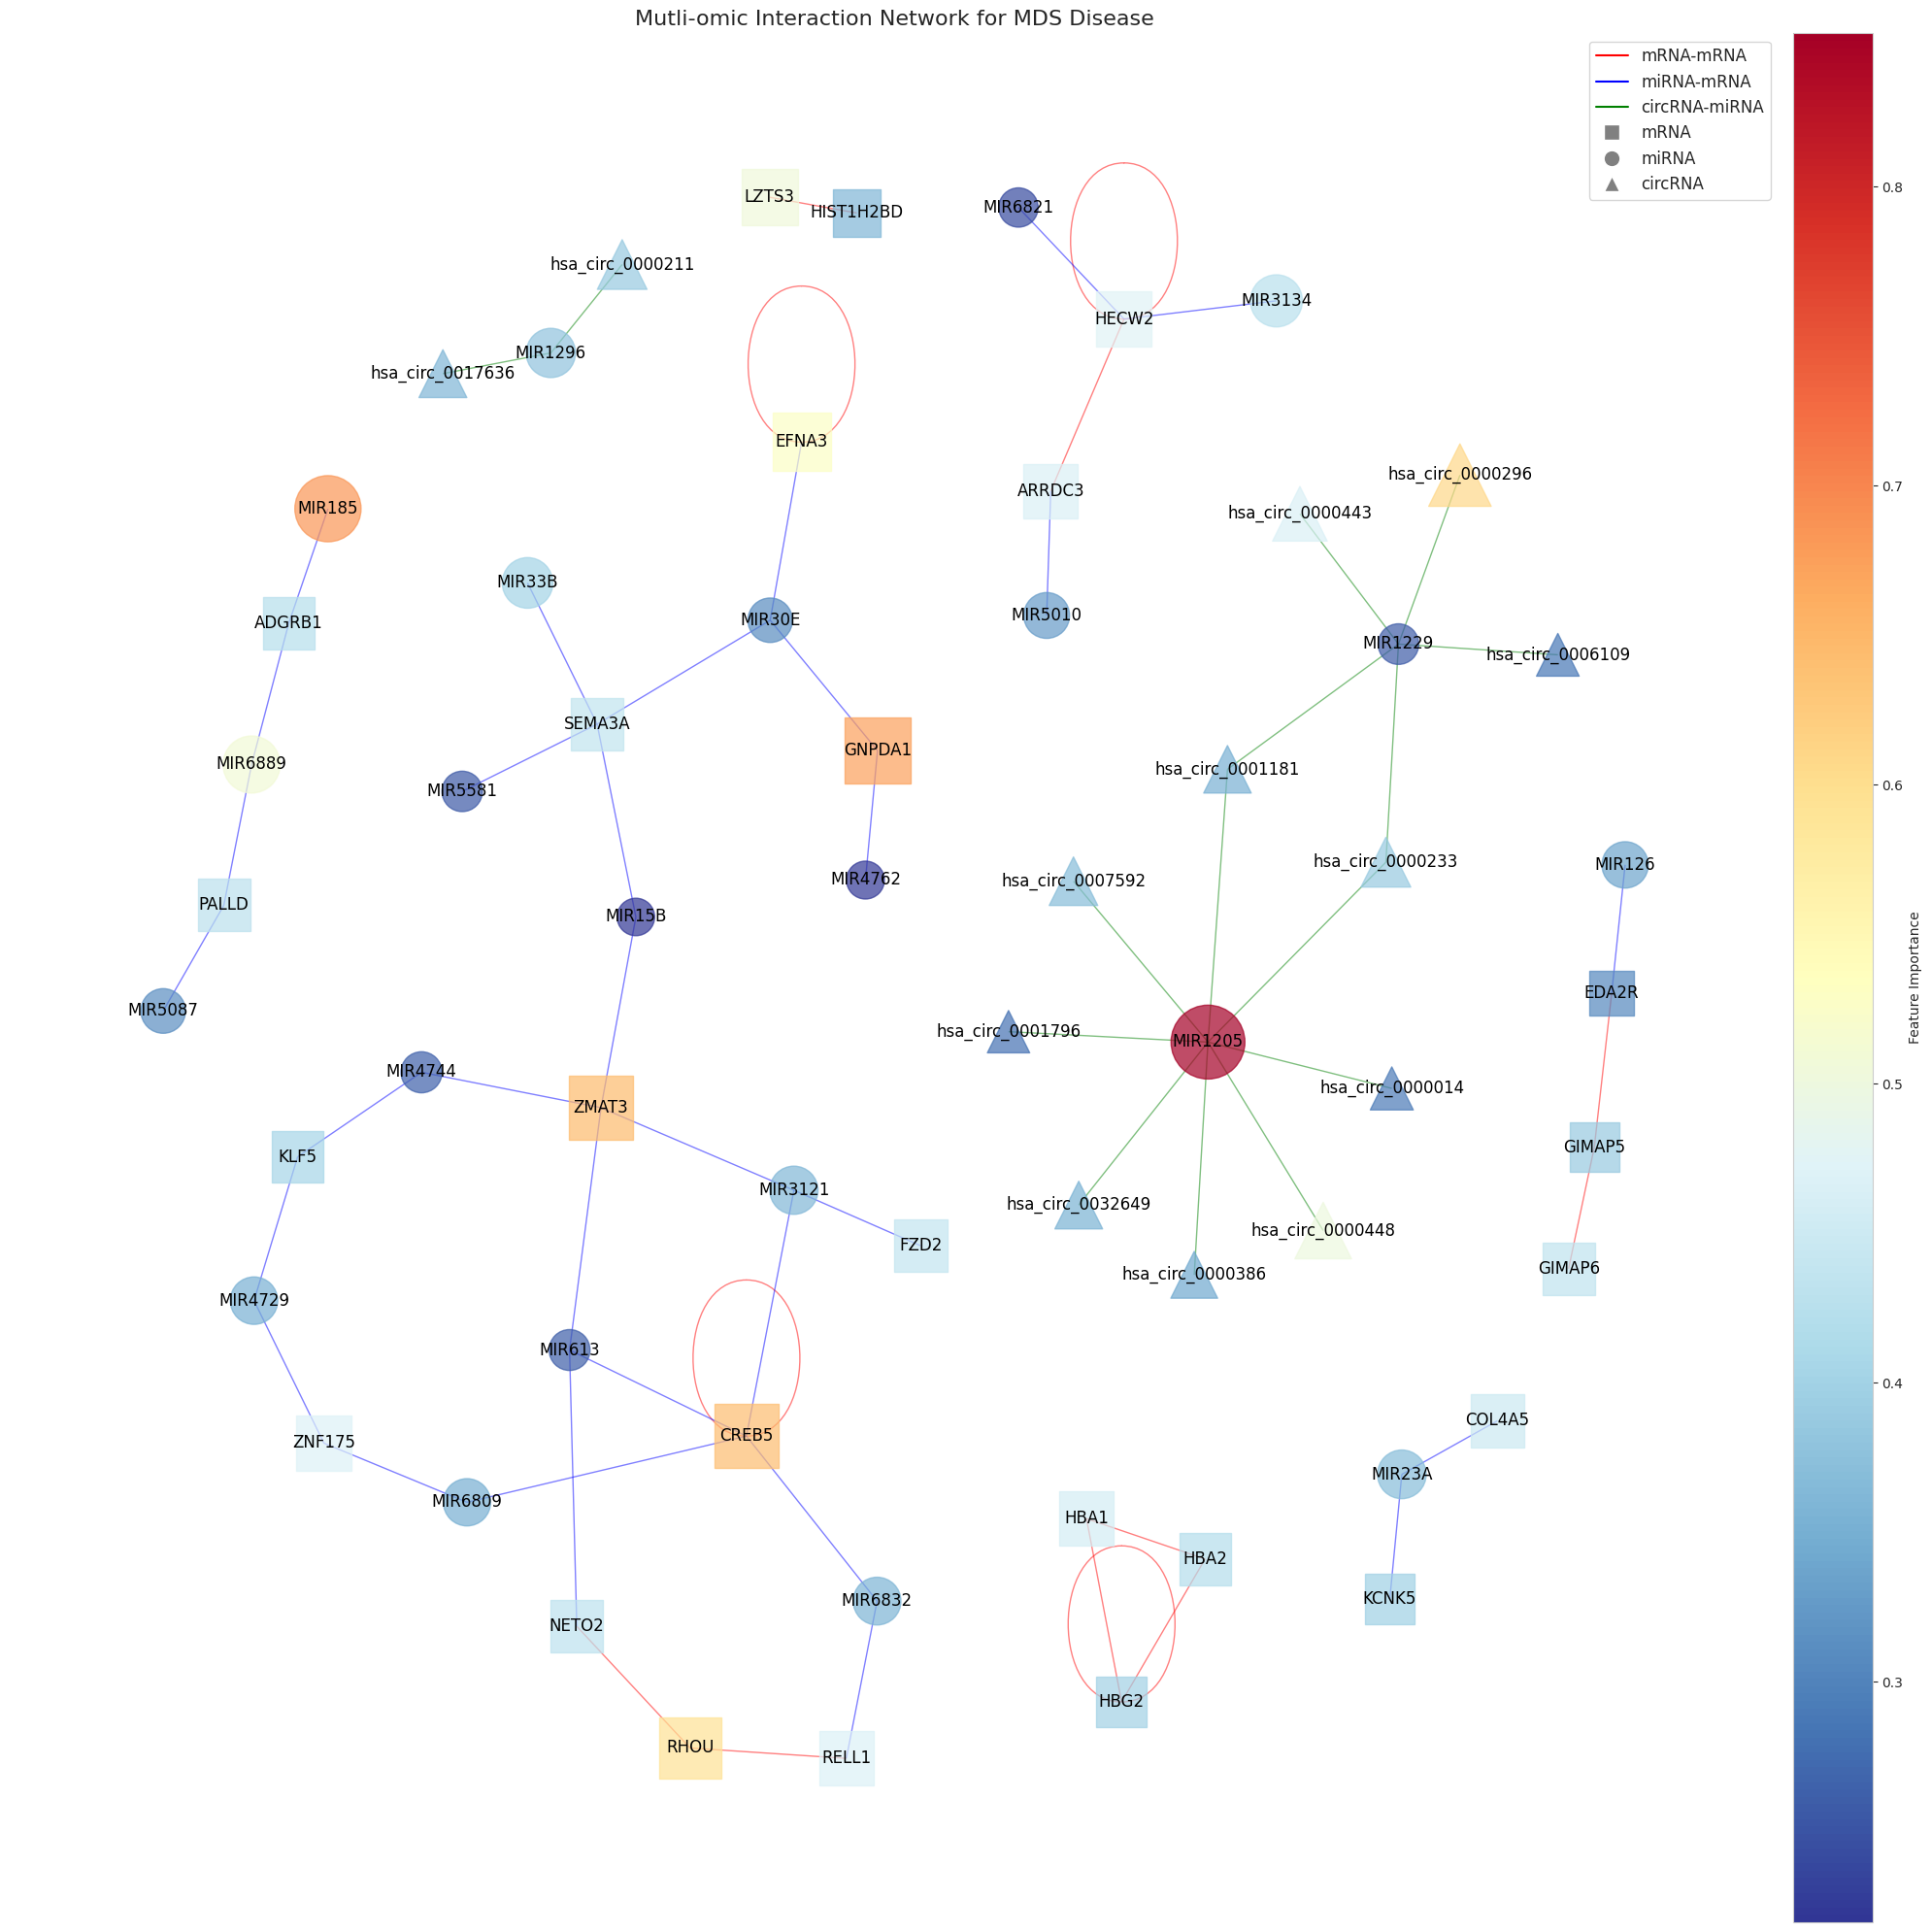

In [124]:
# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# we can also save graph for cytoscape
# nx.write_graphml(G, "plots/disease/disease_multi_omic_network.graphml")

# generate a random number
seed = np.random.randint(0, 10000)
print(seed)

fig = plot_multi_omic_network(
    G,
    seed=seed, 
    title="Mutli-omic Interaction Network for MDS Disease",
    figsize=(20,20),
    max_iter=500,
)
# plt.show()
fig.savefig('plots/disease/disease_multi_omic_network_all_factors_40.png', dpi=100)

- [MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)
- MIR1205 has been implicated to serve a function in other types of cancer https://www.nature.com/articles/s41419-019-2154-4, as a tumor suppressor in lung cancer https://pmc.ncbi.nlm.nih.gov/articles/PMC6405972/, breast cancer https://www.sciencedirect.com/science/article/abs/pii/S0898656824002328, gastric cancer https://www.sciencedirect.com/science/article/pii/S2162253120301335
- has_circr_0000489 reported upregulated in liver cancer https://turkjgastroenterol.org/Content/files/sayilar/391/TJG_April_2023%20(1)-92-104.pdf
- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/), RELL1 identified as an oncogene in glioma cancer https://pubmed.ncbi.nlm.nih.gov/32683297/, RELT protein expression was detected in the spleen, lymph node, brain, breast and peripheral blood leukocytes (PBLs). A smaller than expected size of RELT was observed in PBLs, suggesting a proteolytically cleaved form of RELT.
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)
- hsa_circr_0005325 implicated to serve a function in cervical cancer https://pmc.ncbi.nlm.nih.gov/articles/PMC9884480/, bladder cancer, and AML https://www.researchgate.net/publication/370139513_A_Bioinformatics_Analysis_of_circRNAmiRNAmRNA_Interactions_in_Acute_Myeloid_Leukemia
- [CREB5 identified as biomarker in multiple types of cancer including AML](https://www.sciencedirect.com/science/article/pii/S0010482524003913), [CREB5 glioma cancer](https://www.nature.com/articles/s41420-024-01873-z), [CREB5 in hepatocellular cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC6962929/)
- [GNPDA1 leads to poor prognosis in hepatocellular carcinoma](https://pubmed.ncbi.nlm.nih.gov/32606980/), and in [kidney cancer](https://www.proteinatlas.org/ENSG00000113552-GNPDA1) 

In [106]:
import gseapy as gp

mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

n_top_genes = 100
mrna_dict_enrich = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mrna_genes_enrich = list(mrna_dict.keys())

for g in mrna_genes:
    print(g)

SPSB1
PYGM
GNPDA1
HIST1H2AD
MYZAP
ZMAT3
CREB5
C10orf128
RFX2
RHOU
TP53INP2
RP11-106M3.2
EFNA3
LZTS3
ALDH3B1
PHLDA3
GRASP
HECW2
ZNF175
RELL1
ARRDC3
MAPRE3
HBA1
TGM1
FCN1
COL4A5
FZD2
SEMA3A
GIMAP6
NETO2
PALLD
BATF2
ADGRB1
CCRL2
SRXN1
HBA2
GAS2
KLF5
HBG2
KCNK5


In [107]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=mrna_genes_enrich, # or "./tests/data/gene_list.txt",
    gene_sets=['BioPlanet_2019','KEGG_2021_Human', 'Elsevier_Pathway_Collection', 'WikiPathways_2024_Human', 'Reactome_Pathways_2024'],
    organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
    outdir=None, # don't write to disk
)

In [ ]:
# select by Adjusted P-value < 0.05
results = pl.DataFrame(enr.results)
significant_results = results.filter(pl.col("Adjusted P-value") < 0.05)
# significant_results = significant_results.select(["Gene_set", "Term", "Adjusted P-value", "Genes"])

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
    print(significant_results)

shape: (31, 10)
+-----------------------------+------------------------------+---------+-----------+------------------+-------------+----------------------+------------+----------------+-----------------------------+
| Gene_set                    | Term                         | Overlap | P-value   | Adjusted P-value | Old P-value | Old Adjusted P-value | Odds Ratio | Combined Score | Genes                       |
| ---                         | ---                          | ---     | ---       | ---              | ---         | ---                  | ---        | ---            | ---                         |
| str                         | str                          | str     | f64       | f64              | i64         | i64                  | f64        | f64            | str                         |
+===================================================================================================================================================================================

In [113]:
significant_results = significant_results.select(["Gene_set", "Term", "Adjusted P-value", "Genes"]).sort("Adjusted P-value")

with pl.Config(tbl_rows=-1, tbl_cols=-1, tbl_width_chars=200, fmt_str_lengths=200, set_tbl_formatting='ASCII_FULL'):
    print(significant_results)

shape: (31, 4)
+-----------------------------+-----------------------------------------------------------------------+------------------+-----------------------------------------------------------------------------+
| Gene_set                    | Term                                                                  | Adjusted P-value | Genes                                                                       |
| ---                         | ---                                                                   | ---              | ---                                                                         |
| str                         | str                                                                   | f64              | str                                                                         |
+====================================================================================================================================================================================

| Gene_set | Term | Adjusted P-value | Genes |
|----------|------|------------------|-------|
| Elsevier_Pathway_Collection | Hematopoietic Cell Lineage: B-cell (mouse) | 9.4219e-7 | CD79B;CD79A;VPREB1;IGLL1;CD19;EBF1;DNTT;PAX5;RAG2;CD24;RAG1 |
| Elsevier_Pathway_Collection | Hematopoietic Cell Lineage: B-cell | 9.4219e-7 | CD79B;CD79A;VPREB1;MME;IGLL1;CD19;EBF1;CXCR4;PAX5;CD24 |
| BioPlanet_2019 | Oxygen/carbon dioxide exchange in erythrocytes | 0.000093 | HBB;RHAG;SLC4A1;HBA1;AQP1 |
| Reactome_Pathways_2024 | Erythrocytes Take up Oxygen and Release Carbon Dioxide | 0.000106 | HBB;RHAG;SLC4A1;HBA1;AQP1 |
| Reactome_Pathways_2024 | O2 CO2 Exchange in Erythrocytes | 0.000467 | HBB;RHAG;SLC4A1;HBA1;AQP1 |
| Reactome_Pathways_2024 | Erythrocytes Take up Carbon Dioxide and Release Oxygen | 0.000467 | HBB;RHAG;SLC4A1;HBA1;AQP1 |
| BioPlanet_2019 | Alpha-hemoglobin stabilizing enzyme (AHSP) pathway | 0.00098 | ALAS2;CPOX;HBB;HBA2;HBA1 |
| BioPlanet_2019 | Systemic lupus erythematosus | 0.004273 | HIST1H2AM;C1QB;HLA-DRB5;HIST1H4A;C7;H3F3B;HIST1H2BI;HIST1H2AD;HIST1H4H;HLA-DOA;HIST1H2BD;HIST1H3D |
| WikiPathways_2024_Human | Extrafollicular And Follicular B Cell Activation By SARS CoV 2 WP5218 | 0.005947 | CD79A;MAF;IRF4;CD19;CXCR4;PAX5;CD1D;BACH2;FOXO1 |
| BioPlanet_2019 | Primary immunodeficiency | 0.0085 | CD79A;IGLL1;CD19;TNFRSF13C;RAG2;RAG1 |
| Elsevier_Pathway_Collection | Proerythroblast -> Erythrocyte Surface Expression Markers | 0.01121 | P2RY13;GYPA;SEMA7A;P2RY1;HBB;SLC4A1;AQP1 |
| Elsevier_Pathway_Collection | V(D)J Recombination Activation | 0.01121 | LEF1;EBF1;PAX5;RAG2;FOXO1;RAG1 |
| Elsevier_Pathway_Collection | T-Cell Independent B-Cell Activation | 0.015821 | CD79B;CD79A;CD19;TNFRSF13C;PAX5;RAG2;RAG1 |
| Elsevier_Pathway_Collection | Proteins Involved in Diabetes Mellitus Type 1 | 0.015821 | CD274;COL18A1;HLA-DRB5;SOCS1;SERPINA1;VDR;SLC11A1;TNFSF10;FAS |
| Elsevier_Pathway_Collection | Mucosa-Associated Lymphoid Tissue (MALT) Lymphoma | 0.015821 | CD79B;CD79A;IRF4;TNFAIP3;CXCR4;FAS;TLR6 |
| BioPlanet_2019 | TGF-beta regulation of extracellular matrix | 0.020647 | KCNE3;SEMA3A;LPAR1;TNFAIP2;TNFAIP3;IFIT1;AREG;NID2;IFIT3;C7;PIM1;ME1;TNFSF10;HLA-DOA;SKIL;S100A11;KLF10;MME;GTPBP2;SEPP1;ACTA2;GNPDA1;LOX;STK17B;FBN1 |
| KEGG_2021_Human | Primary immunodeficiency | 0.021862 | CD79A;IGLL1;CD19;TNFRSF13C;RAG2;RAG1 |
| BioPlanet_2019 | BDNF signaling pathway | 0.022065 | KLF10;IGFBP4;TUBB;SEMA3A;AQP3;CLCN5;NR4A3;C7;DPYSL3;MAFF;PDE4B;H1FX;S100A11;HIST1H2BD;FBN1 |
| BioPlanet_2019 | FSH regulation of apoptosis | 0.022065 | KLF10;COL18A1;IGFBP4;TUBB;MT1X;AREG;EREG;AKAP12;ACTA2;PTPRE;DAB2;ENC1;FDXR;FILIP1L;LDLR |
| Elsevier_Pathway_Collection | Mantle Cell Lymphoma | 0.023506 | CD79B;CD79A;SOCS1;LEF1;PIM1;TNFAIP3;CXCR4;TCF4;TNFRSF13C |
| Elsevier_Pathway_Collection | Diffuse Large-B-Cell Lymphoma | 0.038062 | CD79B;CD274;CD79A;SOCS1;IRF4;TNFAIP3;FAS;PDCD1LG2 |
| Elsevier_Pathway_Collection | Hashimoto's Thyroiditis | 0.038062 | CD79B;CD79A;TNFRSF10B;FAS;RAG2;RAG1 |
| BioPlanet_2019 | Prolactin regulation of apoptosis | 0.038125 | EFNA1;CISH;MAFF;UBTD1;PHLDA1;AREG;LMCD1;BACH2;CA13 |
| BioPlanet_2019 | Activation of pro-caspase 8 | 0.038125 | TNFSF10;FAS;TNFRSF10B |
| Elsevier_Pathway_Collection | Thymic Follicular Hyperplasia | 0.041042 | CD79B;CD79A;VDR;CXCR4;TNFRSF13C |
| Elsevier_Pathway_Collection | Immune Sustem Activation in Hashimoto's Thyroiditis | 0.041042 | CD79B;CD79A;VDR;RAG2;RAG1 |
| Elsevier_Pathway_Collection | Follicular Lymphoma | 0.041042 | CD79B;CD79A;TNFAIP3;CXCR4;FAS;TNFRSF13C;GADD45G;IL12RB2 |
| Elsevier_Pathway_Collection | EctodysplasinR -> LEF1 Signaling | 0.04489 | EDA;LEF1;EDA2R |
| Elsevier_Pathway_Collection | Peripheral T-Cell Tolerance | 0.04489 | CD274;TNFSF10;TNFRSF10B;FAS;TNFRSF25;PDCD1LG2 |
| Elsevier_Pathway_Collection | Myoblast -> Neutrophil Surface Expression Markers | 0.04489 | CD274;TNFSF10;LPAR1;CXCR4;CD24;CMKLR1 |
| Elsevier_Pathway_Collection | Hodgkin and Reed-Sternberg Cells Reprogramming | 0.04489 | SOCS1;POU2AF1;EBF1;PAX5 |